<a href="https://colab.research.google.com/github/PacktPublishing/Hands-On-Computer-Vision-with-PyTorch/blob/master/Chapter05/2D_and_3D_facial_keypoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# !pip install -qU face-alignment torch_snippets
import face_alignment
from torch_snippets import read, show

In [3]:
!wget https://www.dropbox.com/s/2s7xjto7rb6q7dc/Hema.JPG

--2022-03-02 07:17:55--  https://www.dropbox.com/s/2s7xjto7rb6q7dc/Hema.JPG
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6025:18::a27d:4512, 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6025:18::a27d:4512|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2s7xjto7rb6q7dc/Hema.JPG [following]
--2022-03-02 07:17:56--  https://www.dropbox.com/s/raw/2s7xjto7rb6q7dc/Hema.JPG
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb0161096b81097d17338db1fae.dl.dropboxusercontent.com/cd/0/inline/BgoGhsW3QeswWPw_9qqrckS7FalPGDHAWfBRKjc35OG0Gk33YBu8iC7ejjCi5i_1qpjVrRspx5Et8su2wqKEvhIqt1UEyql3IA83zWDcCCxPytbTxrGUQwdua4YBhLbxr0Rug4I6U3uiw5YOaib-jUMU/file# [following]
--2022-03-02 07:17:57--  https://ucb0161096b81097d17338db1fae.dl.dropboxusercontent.com/cd/0/inline/BgoGhsW3QeswWPw_9qqrckS7FalPGDHAWfBRKjc35OG0Gk33YBu8iC7ejjCi5i_1qpjVrRspx5Et8su2wqK

In [4]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False, device='cpu')

Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /home/guy/.cache/torch/hub/checkpoints/s3fd-619a316812.pth
100%|██████████| 85.7M/85.7M [00:16<00:00, 5.37MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/2DFAN4-cd938726ad.zip" to /home/guy/.cache/torch/hub/checkpoints/2DFAN4-cd938726ad.zip
100%|██████████| 91.9M/91.9M [00:12<00:00, 7.61MB/s]


In [5]:
input = read('Hema.JPG', 1)
preds = fa.get_landmarks(input)[0]
print(preds.shape)

(68, 2)


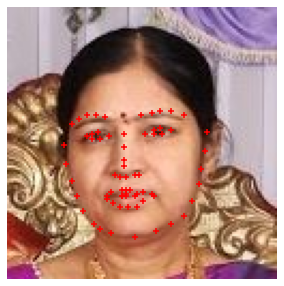

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(5,5))
show(read('Hema.JPG',1), ax=ax)
ax.scatter(preds[:,0], preds[:,1], marker='+', c='r')
plt.show()

In [7]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, flip_input=False, device='cpu')
input = read('Hema.JPG', 1)
preds = fa.get_landmarks(input)[0]
import pandas as pd
df = pd.DataFrame(preds)
df.columns = ['x','y','z']
import plotly.express as px
fig = px.scatter_3d(df, x = 'x', y = 'y', z = 'z')
fig.show()

Downloading: "https://www.adrianbulat.com/downloads/python-fan/3DFAN4-4a694010b9.zip" to /home/guy/.cache/torch/hub/checkpoints/3DFAN4-4a694010b9.zip
100%|██████████| 91.9M/91.9M [00:14<00:00, 6.63MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/depth-6c4283c0e0.zip" to /home/guy/.cache/torch/hub/checkpoints/depth-6c4283c0e0.zip
100%|██████████| 224M/224M [00:35<00:00, 6.62MB/s] 
